<a href="https://colab.research.google.com/github/Bady9898/Clustering/blob/main/Assignment7_Airline_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import Neccessary libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering , KMeans , DBSCAN


Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.


In [2]:
#import data
airline_data = pd.read_csv("/content/EastWestAirlines.csv")
airline_data.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airline_data.shape

(3999, 12)

In [4]:
from sklearn import preprocessing
air_data_n = preprocessing.scale(airline_data)#standardize the data
air_data_n = pd.DataFrame(air_data_n) 
air_data_n.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


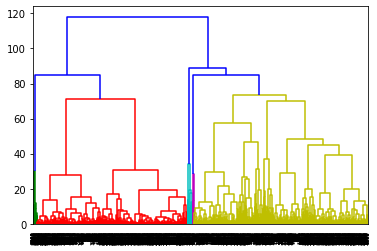

In [5]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(air_data_n, method='ward'))

## Finding optimal number of clusters

### elbow method

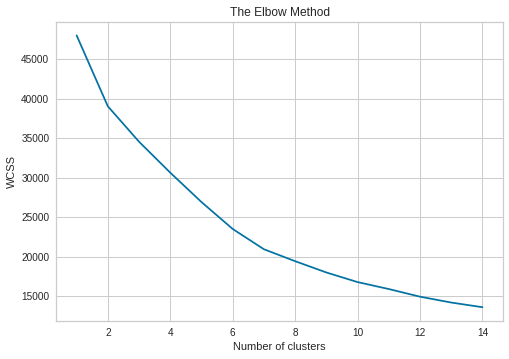

In [9]:

#plt.figure(figsize=(10, 5))
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i,random_state = 12)
    kmeans.fit(air_data_n)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From above, the slope changes at 2 but taking just 2 groups will not be beneficial , So we will take optimum no. =6 , because after this point there is no sudden drop in the wcss

**silhouette_score**

In [10]:
from sklearn.metrics import silhouette_score as sil

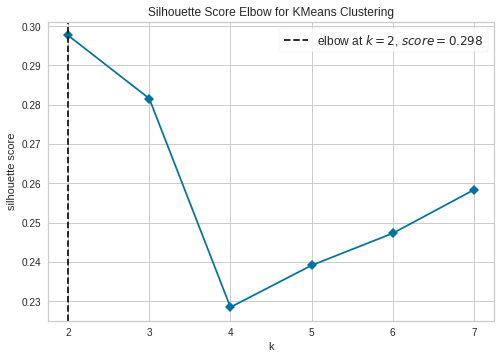

In [11]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=123) 
visualizer = KElbowVisualizer(model, k=(2,8), metric='silhouette', timings=False)
visualizer.fit(air_data_n)    
visualizer.poof()

from the above method we got the sihouete score =2 but taking just 2 groups will not be beneficial , so we wil go with elbow method

## ---------------------------------------------------------------------------------------------------------------------------
## 1. Hierarchial clustering

In [25]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=6)

In [26]:
hc.fit_predict(air_data_n)

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
y_hc=hc.fit_predict(air_data_n)

In [28]:
Clusters_hc=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters_hc.head(5)

,Clusters
0,0
1,0
2,0
3,0
4,0


In [29]:
airline_data1=airline_data.copy()

In [30]:
airline_data1['clusters_hc'] = Clusters_hc
airline_data1.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_hc
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [31]:
airline_data1[airline_data1['clusters_hc']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_hc
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [32]:
airline_data1[airline_data1['clusters_hc']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_hc
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
226,230,117329,0,1,2,1,6448,11,0,0,7416,1,1
392,398,11189,0,1,2,1,9044,20,0,0,8296,1,1
561,568,380930,0,2,2,1,22485,25,213,1,6539,1,1
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,1
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,1
1383,1397,18154,0,1,2,1,7748,16,0,0,5310,1,1
1389,1403,49145,0,1,2,1,12755,22,2450,7,5323,0,1
1527,1542,23965,0,1,2,1,7308,16,550,3,5003,0,1
1541,1556,36887,0,1,2,1,9048,11,0,0,4951,0,1


In [33]:
airline_data1[airline_data1['clusters_hc']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_hc
198,202,8669,0,1,3,1,11397,16,0,0,7486,1,2
381,386,167670,0,1,3,1,15907,13,0,0,6994,0,2
940,951,44824,0,1,3,1,21107,19,2000,4,5916,1,2
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,2
1791,1808,32510,0,1,3,1,14568,13,0,0,4341,0,2
1918,1935,52139,0,1,3,1,16314,14,250,1,3965,0,2
2047,2064,4148,0,1,3,1,13504,18,0,0,4607,1,2
2166,2183,100634,0,1,3,1,69669,28,1540,12,4193,1,2
2278,2296,30171,0,1,3,1,15370,13,0,0,3853,0,2
2978,3000,22805,0,1,3,1,26334,27,1800,6,3294,1,2


In [34]:
airline_data1[airline_data1['clusters_hc']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_hc
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,3


In [35]:
airline_data1[airline_data1['clusters_hc']==4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_hc
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,4


In [36]:
airline_data1[airline_data1['clusters_hc']==5]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_hc
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,5


In [37]:
airline_data1.groupby('clusters_hc').agg(['mean']).reset_index()

,clusters_hc,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2012.264609,7.305023e+04,145.412092,2.069820,1.0,1.011637,17150.903618,11.506198,449.511763,1.344548,4119.850493,0.369846
1,1,2300.107143,7.779364e+04,0.000000,1.214286,2.0,1.000000,11625.214286,16.785714,523.678571,1.678571,3911.821429,0.392857
2,2,2212.000000,5.223140e+04,66.666667,1.000000,3.0,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000
3,3,3606.000000,1.601140e+05,500.000000,1.000000,1.0,1.000000,71954.000000,86.000000,30817.000000,53.000000,1373.000000,1.000000
4,4,279.000000,1.704838e+06,0.000000,1.000000,1.0,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.000000
5,5,1313.000000,7.375140e+05,0.000000,3.000000,1.0,4.000000,43993.000000,40.000000,2150.000000,7.000000,5030.000000,0.000000


## ----------------------------------------------------------------------------------------------------------------------------
#### KMEAN CLUSTERING

In [38]:
KMean = KMeans(n_clusters=6, max_iter=600, algorithm = 'auto',init="k-means++")

In [39]:
y_kmean=KMean.fit_predict(air_data_n)
y_kmean

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [40]:
KMean.cluster_centers_

array([[ 0.96698015, -0.33802015, -0.05241763, -0.50151495, -0.09824189,
        -0.06276658, -0.46183285, -0.41834168, -0.18819763, -0.20693603,
        -0.95807978, -0.35635809],
       [-0.79374807, -0.16326753, -0.05876323, -0.50918886, -0.09824189,
        -0.05873944, -0.47175032, -0.39089687, -0.16553333, -0.17664919,
         0.77225888, -0.25246597],
       [-0.30152248,  0.63971926, -0.08443292,  1.0220844 , -0.09824189,
        15.64629931,  3.17969131,  1.71461374,  0.03329269,  0.05969539,
         0.23987261,  0.33752735],
       [-0.39326741,  0.51242422,  0.02653687,  1.35981814, -0.09824189,
        -0.05276166,  1.12237626,  0.79890128, -0.06452417, -0.07095245,
         0.39623627,  0.68913829],
       [ 0.21932485, -0.04688966, -0.1562356 , -0.66822727,  9.03825361,
        -0.06276658, -0.10166533,  0.61785114,  0.0875494 ,  0.22034681,
        -0.07246398,  0.05178388],
       [-0.23852715,  1.18446344,  0.88037642,  0.11446574, -0.09824189,
        -0.06276658,  

In [41]:
Cluster_kmean=pd.DataFrame(y_kmean,columns=['Clusters'])
Cluster_kmean.head(5)

,Clusters
0,1
1,1
2,1
3,1
4,3


In [42]:
airline_data2=airline_data.copy()

In [43]:
airline_data2['clusters_kmean'] = Cluster_kmean
airline_data2.head(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_kmean
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [44]:
airline_data2[airline_data2['clusters_kmean']==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_kmean
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,0
1424,1438,22093,0,3,1,1,14857,11,200,1,2587,0,0
1950,1967,15676,0,1,1,1,0,0,0,0,3178,0,0
1951,1968,55064,0,2,1,1,8041,13,0,0,3329,1,0
1952,1969,40675,0,1,1,1,1413,9,0,0,2895,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [45]:
airline_data2[airline_data2['clusters_kmean']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_kmean
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,2193,194875,0,1,1,1,7550,6,1050,3,3831,1,1
2184,2201,109268,0,2,1,1,7401,17,750,1,4034,0,1
2194,2211,81251,0,1,1,1,19500,6,0,0,3958,1,1
2200,2217,12271,500,2,1,1,7684,15,1000,2,4219,0,1


In [46]:
airline_data2[airline_data2['clusters_kmean']==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_kmean
106,109,96627,1182,1,1,3,49059,26,2300,9,6738,1,2
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,2
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,2
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,2
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,2
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,2
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,2
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,2
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,2
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,2


In [47]:
airline_data2[airline_data2['clusters_kmean']==3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_kmean
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,3
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,3
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,3
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3881,3904,32424,0,4,1,1,39635,16,0,0,1584,1,3
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,3
3897,3920,179832,2954,3,1,1,18218,20,2500,5,1569,1,3
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,3


In [48]:
airline_data2[airline_data2['clusters_kmean']==4]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_kmean
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,4
198,202,8669,0,1,3,1,11397,16,0,0,7486,1,4
226,230,117329,0,1,2,1,6448,11,0,0,7416,1,4
381,386,167670,0,1,3,1,15907,13,0,0,6994,0,4
392,398,11189,0,1,2,1,9044,20,0,0,8296,1,4
561,568,380930,0,2,2,1,22485,25,213,1,6539,1,4
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,4
940,951,44824,0,1,3,1,21107,19,2000,4,5916,1,4
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,4
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,4


In [49]:
airline_data2[airline_data2['clusters_kmean']==5]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters_kmean
42,43,60313,0,1,1,1,10000,26,3250,9,7829,1,5
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,5
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,5
112,115,124198,0,5,1,1,66330,23,4833,10,7710,0,5
127,130,213150,0,4,1,1,56308,41,5200,14,7645,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3907,3930,126490,0,1,1,1,8808,15,5183,12,1566,0,5
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,5
3917,3940,130748,0,4,1,1,65510,37,6349,7,1545,0,5
3934,3957,76595,0,1,1,1,10577,2,9577,1,1515,0,5


In [50]:
airline_data2.groupby('clusters_kmean').agg(['mean']).reset_index()

,clusters_kmean,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,3137.115204,39541.381782,103.565975,1.369056,1.000000,1.000000,5992.530476,7.584729,196.572672,0.588747,2140.243135,0.198259
1,1,1093.580189,57149.991352,98.657233,1.358491,1.000000,1.000786,5753.044025,7.848270,228.303459,0.703616,5713.178459,0.248428
2,2,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,1558.385742,125234.761719,164.642578,3.931641,1.000000,1.001953,44247.929688,19.273438,369.719727,1.104492,4936.738281,0.703125
4,4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
5,5,1737.980263,192951.493421,825.144737,2.217105,1.000000,1.000000,32546.440789,27.486842,5556.789474,16.243421,4687.375000,0.815789


**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## **DBSCAN CLUSTERING**

In [51]:
dbs=DBSCAN(min_samples=6,eps=1)
cluster_dbs=dbs.fit_predict(air_data_n)

In [52]:
cluster_dbs

array([0, 0, 0, ..., 1, 0, 0])

In [53]:
airline_data3= airline_data.copy()

In [54]:
airline_data3["cluster_dbs"]=cluster_dbs
airline_data3.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_dbs
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [55]:
airline_data3.groupby('cluster_dbs').agg(['mean']).reset_index()

,cluster_dbs,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1738.086103,170483.540785,824.299094,2.660121,1.070997,1.074018,37336.693353,21.095166,2036.253776,5.888218,4649.353474,0.664653
1,0,2186.855512,51991.545015,1.696091,1.648221,1.000000,1.000000,8844.709706,8.364954,110.421168,0.366711,3795.987264,0.000000
2,1,1787.494665,60027.934045,5.953443,2.597478,1.000000,1.000000,22487.251212,12.698351,214.656644,0.689622,4532.278371,1.000000
3,2,2843.545455,28365.363636,0.000000,1.000000,2.000000,1.000000,8825.272727,11.818182,22.727273,0.181818,2702.000000,0.000000
4,3,2284.000000,129051.250000,0.000000,4.750000,1.000000,1.000000,90312.750000,18.500000,218.750000,0.500000,3789.250000,1.000000
5,4,3215.375000,28382.500000,2578.500000,1.000000,1.000000,1.000000,2130.875000,3.500000,50.000000,0.375000,1864.875000,0.000000
6,5,3022.500000,23795.500000,0.000000,1.000000,1.000000,1.000000,7702.166667,10.000000,2916.333333,7.000000,2701.166667,1.000000
